# Visualization of Label Smoothing

In this notebook I tried to implement a visualization techniques for label smoothing. It was in the early state of part 2 of the project, and probably is not working. 

## Imports and data loading

In [1]:
import torch
import jupyter_black
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from data_generators import (
    data_loader_MNIST,
    data_loader_CIFAR10,
    data_loader_CIFAR100,
)
from model_classes import LeNet
from tools import train
from plotting_tools import plot_results

jupyter_black.load()

c:\Users\aslak\.conda\envs\pytorch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
# Loading datasets

# Loading MNIST dataset
train_loader_MNIST, test_loader_MNIST = data_loader_MNIST()

# Loading CIFAR10 dataset
train_loader_CIFAR10, test_loader_CIFAR10 = data_loader_CIFAR10()

# Loading CIFAR100 dataset
train_loader_CIFAR100, test_loader_CIFAR100 = data_loader_CIFAR100()

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


## Hyperparameters

In [4]:
lr = 0.01
momentum = 0.9

## Training models with and without label smoothing

### Training MNIST Models

In [5]:
in_channels = 1

In [6]:
model_no_reg_MNIST = LeNet(
    lr=lr, momentum=momentum, in_channels=in_channels, orthogonal=False
).to(device)
model_label_smoothing_MNIST = LeNet(
    lr=lr, momentum=momentum, in_channels=in_channels, orthogonal=False
).to(device)

In [7]:
n_epochs = 5

In [8]:
losses1, reg_losses1, epochs1, weights1, train_accuracies1, test_accuracies1 = train(
    train_loader_MNIST, test_loader_MNIST, model_no_reg_MNIST, n_epochs
)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0


 20%|██        | 1/5 [00:30<02:00, 30.14s/it]

Accuracy of the network on the test images: 17 %
Epoch: 1


 40%|████      | 2/5 [00:58<01:27, 29.23s/it]

Accuracy of the network on the test images: 73 %
Epoch: 2


 60%|██████    | 3/5 [01:27<00:58, 29.09s/it]

Accuracy of the network on the test images: 75 %
Epoch: 3


 80%|████████  | 4/5 [01:55<00:28, 28.65s/it]

Accuracy of the network on the test images: 77 %
Epoch: 4


100%|██████████| 5/5 [02:24<00:00, 28.92s/it]

Accuracy of the network on the test images: 78 %


In [9]:
losses2, reg_losses2, epochs2, weights2, train_accuracies2, test_accuracies2 = train(
    train_loader_MNIST,
    test_loader_MNIST,
    model_label_smoothing_MNIST,
    n_epochs,
    label_smoothing=True,
    label_smoothing_lmbd=0.00000001,
)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0


 20%|██        | 1/5 [00:32<02:08, 32.04s/it]

Accuracy of the network on the test images: 20 %
Epoch: 1


 40%|████      | 2/5 [01:04<01:37, 32.33s/it]

Accuracy of the network on the test images: 23 %
Epoch: 2


 60%|██████    | 3/5 [01:34<01:02, 31.19s/it]

Accuracy of the network on the test images: 58 %
Epoch: 3


 80%|████████  | 4/5 [02:03<00:30, 30.51s/it]

Accuracy of the network on the test images: 82 %
Epoch: 4


100%|██████████| 5/5 [02:34<00:00, 30.92s/it]

Accuracy of the network on the test images: 83 %


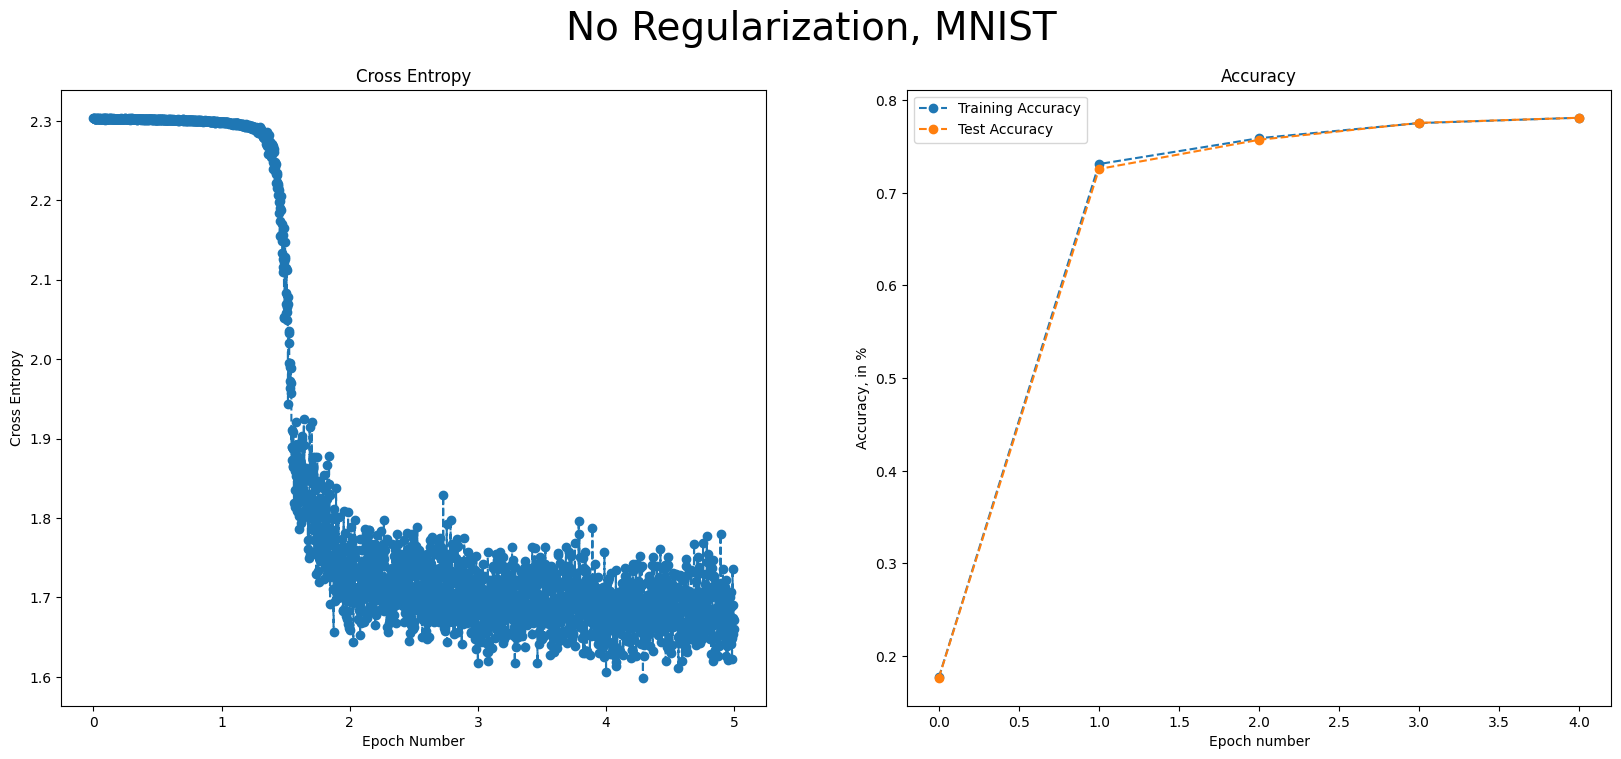

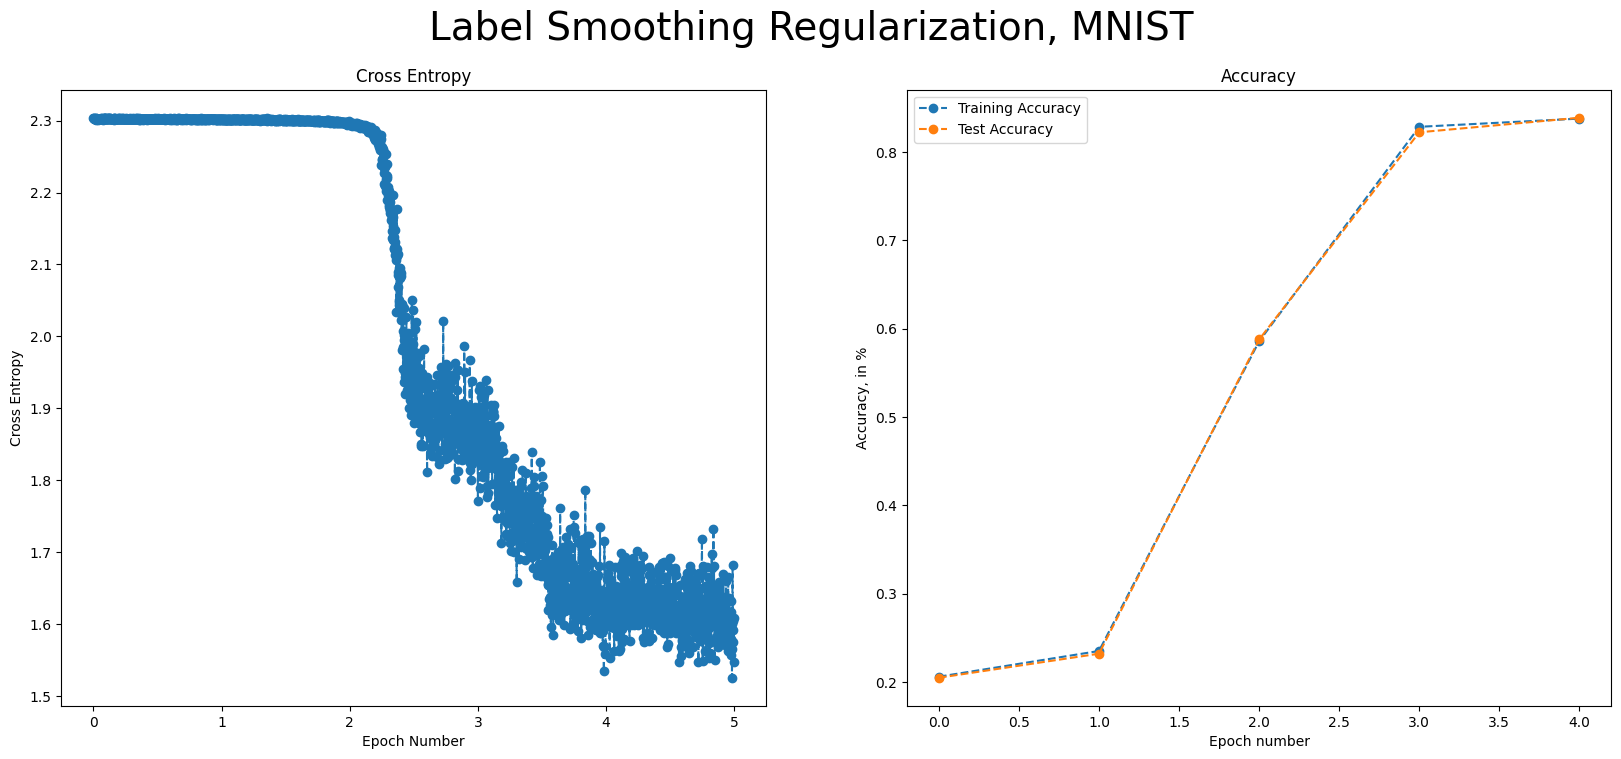

In [10]:
plot_results(
    epochs1,
    losses1,
    train_accuracies1,
    test_accuracies1,
    title="No Regularization, MNIST",
)
plot_results(
    epochs2,
    losses2,
    train_accuracies2,
    test_accuracies2,
    title="Label Smoothing Regularization, MNIST",
)

### Training CIFAR10 Models

In [11]:
in_channels = 3

In [12]:
model_no_reg_CIFAR10 = LeNet(
    lr=lr, momentum=momentum, in_channels=in_channels, orthogonal=False
).to(device)
model_label_smoothing_CIFAR10 = LeNet(
    lr=lr, momentum=momentum, in_channels=in_channels, orthogonal=False
).to(device)

In [13]:
n_epochs = 5

In [14]:
losses3, reg_losses3, epochs3, weights3, train_accuracies3, test_accuracies3 = train(
    train_loader_CIFAR10, test_loader_CIFAR10, model_no_reg_CIFAR10, n_epochs
)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0


 20%|██        | 1/5 [00:51<03:25, 51.29s/it]

Accuracy of the network on the test images: 10 %
Epoch: 1


 40%|████      | 2/5 [01:40<02:30, 50.04s/it]

Accuracy of the network on the test images: 29 %
Epoch: 2


 60%|██████    | 3/5 [02:30<01:39, 49.87s/it]

Accuracy of the network on the test images: 34 %
Epoch: 3


 80%|████████  | 4/5 [03:19<00:49, 49.70s/it]

Accuracy of the network on the test images: 39 %
Epoch: 4


100%|██████████| 5/5 [04:12<00:00, 50.42s/it]

Accuracy of the network on the test images: 41 %


In [15]:
losses4, reg_losses4, epochs4, weights4, train_accuracies4, test_accuracies4 = train(
    train_loader_CIFAR10,
    test_loader_CIFAR10,
    model_label_smoothing_CIFAR10,
    n_epochs,
    label_smoothing=True,
    label_smoothing_lmbd=0.00000001,
)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0


 20%|██        | 1/5 [00:48<03:15, 48.93s/it]

Accuracy of the network on the test images: 14 %
Epoch: 1


 40%|████      | 2/5 [01:34<02:21, 47.15s/it]

Accuracy of the network on the test images: 29 %
Epoch: 2


 60%|██████    | 3/5 [02:24<01:36, 48.48s/it]

Accuracy of the network on the test images: 33 %
Epoch: 3


 80%|████████  | 4/5 [03:13<00:48, 48.45s/it]

Accuracy of the network on the test images: 38 %
Epoch: 4


100%|██████████| 5/5 [04:03<00:00, 48.67s/it]

Accuracy of the network on the test images: 41 %


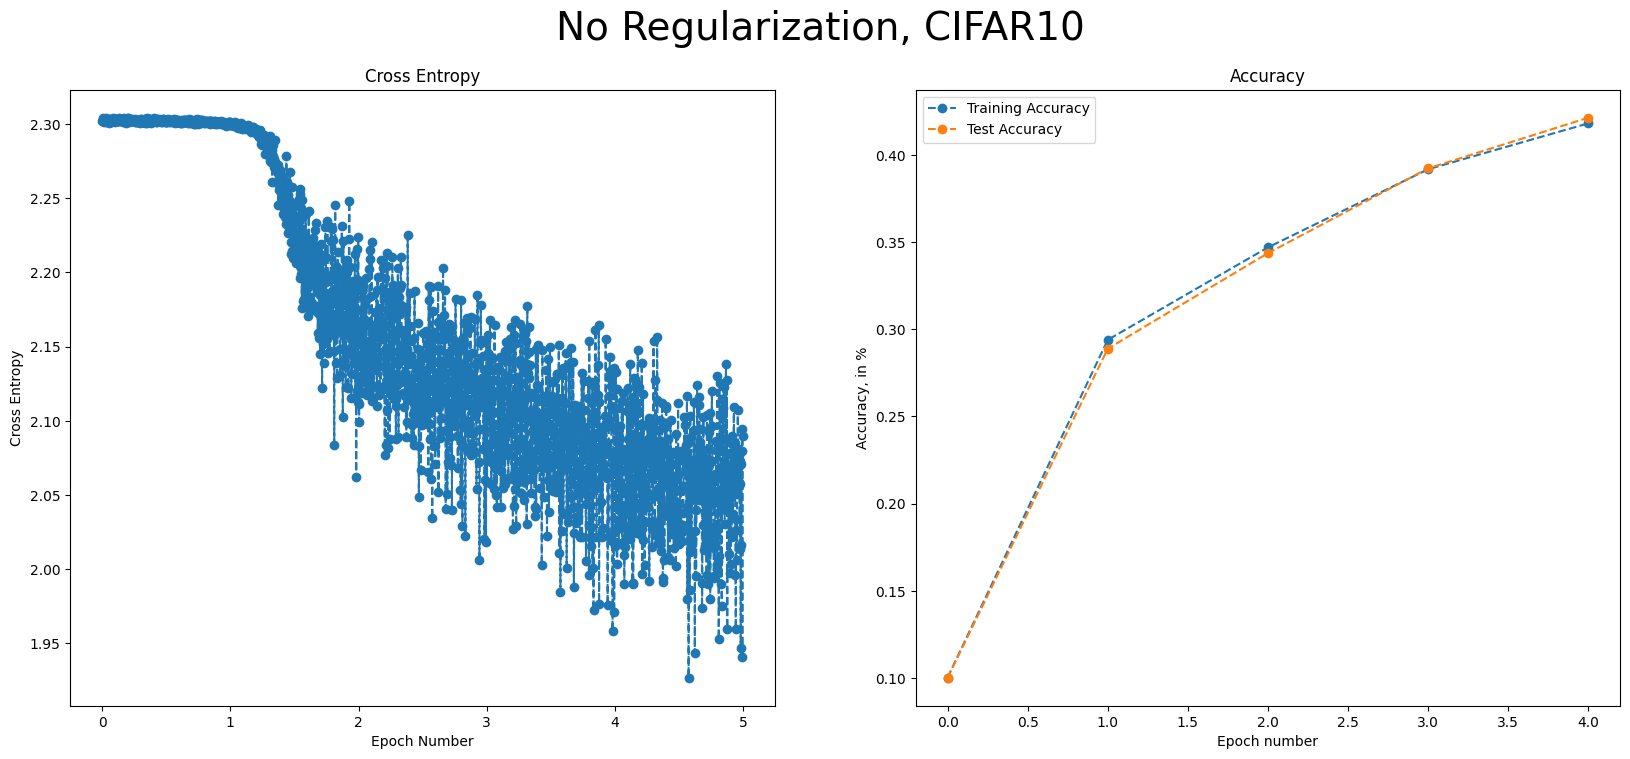

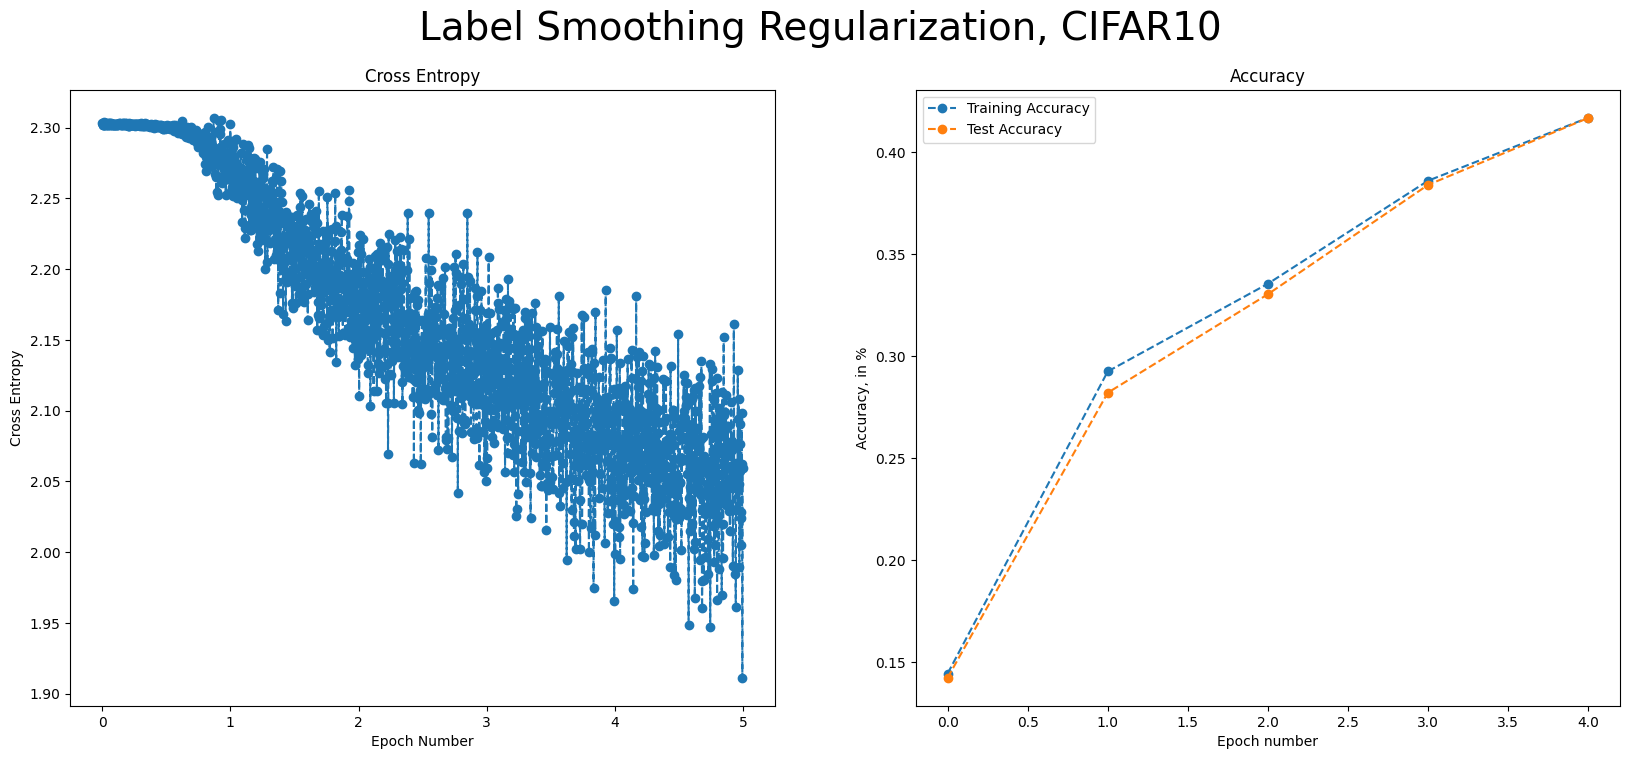

In [16]:
plot_results(
    epochs3,
    losses3,
    train_accuracies3,
    test_accuracies3,
    title="No Regularization, CIFAR10",
)
plot_results(
    epochs4,
    losses4,
    train_accuracies4,
    test_accuracies4,
    title="Label Smoothing Regularization, CIFAR10",
)

### Training CIFAR100 Models

In [17]:
in_channels = 3

In [18]:
model_no_reg_CIFAR100 = LeNet(
    lr=0.001, momentum=momentum, in_channels=in_channels, orthogonal=False, N_images=100
).to(device)
model_label_smoothing_CIFAR100 = LeNet(
    lr=0.001, momentum=momentum, in_channels=in_channels, orthogonal=False, N_images=100
).to(device)

In [19]:
n_epochs = 5

In [20]:
losses5, reg_losses5, epochs5, weights5, train_accuracies5, test_accuracies5 = train(
    train_loader_CIFAR100, test_loader_CIFAR100, model_no_reg_CIFAR100, n_epochs
)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0


 20%|██        | 1/5 [00:50<03:21, 50.29s/it]

Accuracy of the network on the test images: 1 %
Epoch: 1


 40%|████      | 2/5 [01:40<02:31, 50.35s/it]

Accuracy of the network on the test images: 1 %
Epoch: 2


 60%|██████    | 3/5 [02:32<01:41, 50.97s/it]

Accuracy of the network on the test images: 1 %
Epoch: 3


 80%|████████  | 4/5 [03:23<00:50, 50.84s/it]

Accuracy of the network on the test images: 1 %
Epoch: 4


100%|██████████| 5/5 [04:14<00:00, 50.86s/it]

Accuracy of the network on the test images: 1 %


In [21]:
losses6, reg_losses6, epochs6, weights6, train_accuracies6, test_accuracies6 = train(
    train_loader_CIFAR100,
    test_loader_CIFAR100,
    model_label_smoothing_CIFAR100,
    n_epochs,
    label_smoothing=True,
    label_smoothing_lmbd=0.000001,
)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0


 20%|██        | 1/5 [00:49<03:18, 49.58s/it]

Accuracy of the network on the test images: 1 %
Epoch: 1


 40%|████      | 2/5 [01:40<02:30, 50.11s/it]

Accuracy of the network on the test images: 1 %
Epoch: 2


 60%|██████    | 3/5 [02:30<01:40, 50.44s/it]

Accuracy of the network on the test images: 1 %
Epoch: 3


 80%|████████  | 4/5 [03:21<00:50, 50.41s/it]

Accuracy of the network on the test images: 1 %
Epoch: 4


100%|██████████| 5/5 [04:11<00:00, 50.38s/it]

Accuracy of the network on the test images: 1 %


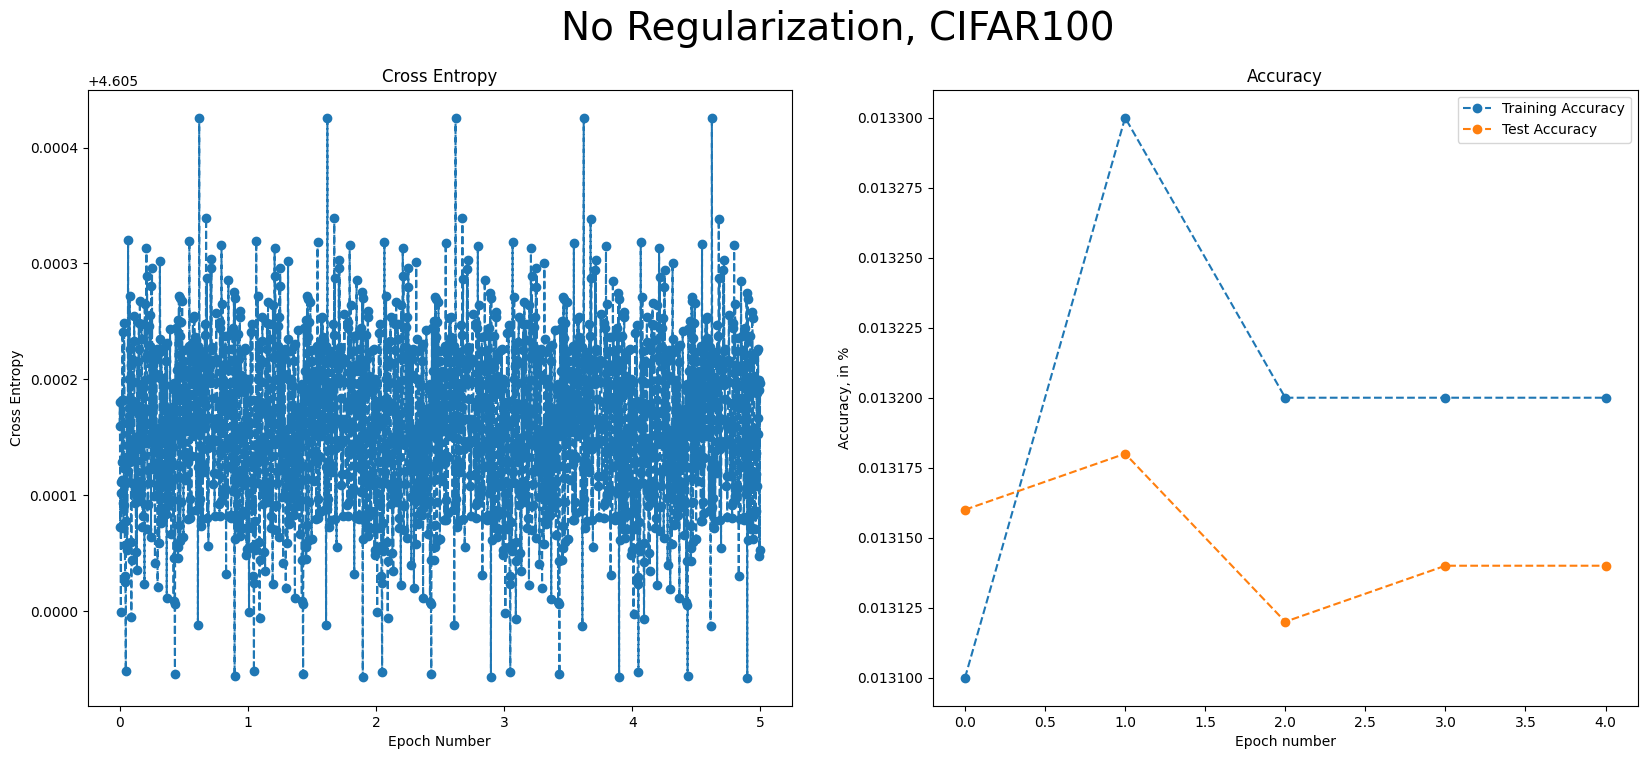

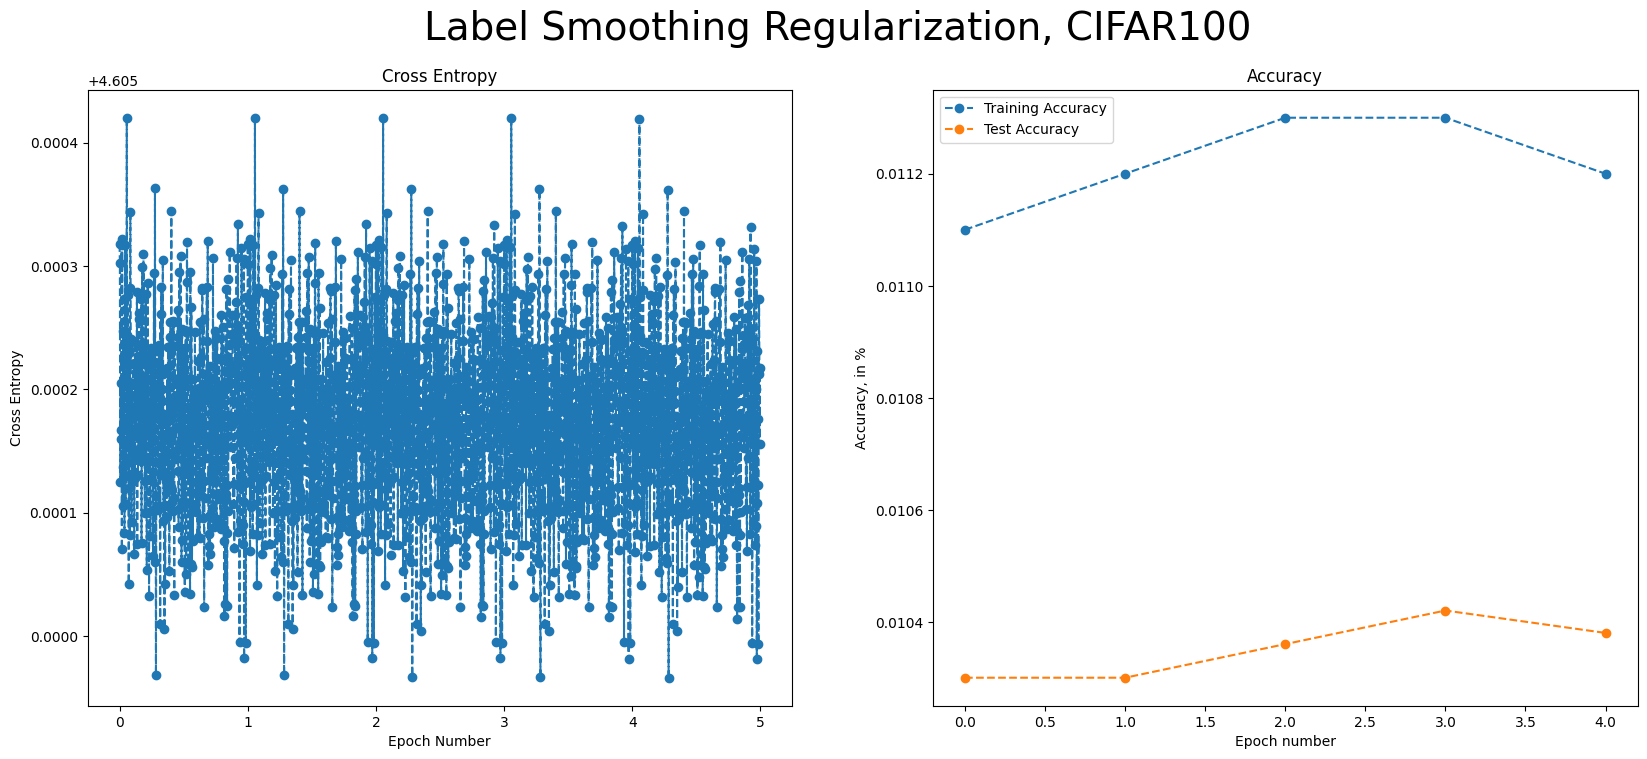

In [22]:
plot_results(
    epochs5,
    losses5,
    train_accuracies5,
    test_accuracies5,
    title="No Regularization, CIFAR100",
)
plot_results(
    epochs6,
    losses6,
    train_accuracies6,
    test_accuracies6,
    title="Label Smoothing Regularization, CIFAR100",
)

## Visualization of Label Smoothing

### Visualization Functions

In [23]:
# Function to extract penultimate layer activations
def extract_penultimate_activations(model, data_loader, class_ids, fraction=1.0):
    num_batches = int(len(data_loader) * fraction)
    activations = []
    labels = []

    for i, (data_batch, label_batch) in tqdm(enumerate(data_loader)):
        if i >= num_batches:
            break

        for data, label in zip(data_batch, label_batch):
            if label.item() in class_ids:
                data = data.unsqueeze(0).to(device)
                with torch.no_grad():
                    x = model.dropout1(
                        F.relu(
                            model.fc1(
                                model.pool(
                                    F.relu(
                                        model.conv2(
                                            model.pool(F.relu(model.conv1(data)))
                                        )
                                    )
                                ).view(-1, 16 * 5 * 5)
                            )
                        )
                    )
                    x = model.dropout2(F.relu(model.fc2(x)))
                activations.append(x.cpu().numpy().flatten())
                labels.append(label.item())

    return np.vstack(activations), labels

In [24]:
# Function to compute 2D projections of activations and templates
def compute_2d_projections(activations, templates):
    # Orthonormal basis of the plane crossing the templates of the three classes
    u, s, vh = np.linalg.svd(templates)
    basis = vh[:2, :]

    # Project the penultimate layer activations of examples from these three classes onto this plane
    projections = np.dot(activations, basis.T)
    template_projections = np.dot(templates, basis.T)

    return projections, template_projections

In [25]:
# Function to plot 2D projections
def plot_2d_projections(
    ax, projections, labels, template_projections, title, class_ids
):
    colors = ["r", "g", "b"]
    markers = ["o", "^", "s"]

    for idx, (proj, label) in enumerate(zip(projections, labels)):
        ax.scatter(
            proj[0], proj[1], color=colors[label], marker=markers[label], alpha=0.7
        )

    for idx, template_proj in enumerate(template_projections):
        ax.scatter(
            template_proj[0],
            template_proj[1],
            color=colors[idx],
            marker=markers[idx],
            edgecolors="k",
            s=150,
            linewidths=2,
            label=f"Class {class_ids[idx]}",
        )

    ax.set_xlabel("First basis vector")
    ax.set_ylabel("Second basis vector")
    ax.legend()
    ax.set_title(title)

In [29]:
def plot_label_smoothing_2d_projections(
    model,
    train_loader,
    test_loader,
    class_ids,
    train_title,
    test_title,
    sup_title,
    fraction=1.0,
):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

    # Plot training data
    activations, labels = extract_penultimate_activations(
        model, train_loader, class_ids, fraction
    )
    templates = model.fc3.weight[class_ids, :].detach().cpu().numpy()
    projections, template_projections = compute_2d_projections(activations, templates)
    plot_2d_projections(
        ax1, projections, labels, template_projections, train_title, class_ids
    )

    # Plot test data
    activations, labels = extract_penultimate_activations(model, test_loader, class_ids)
    templates = model.fc3.weight[class_ids, :].detach().cpu().numpy()
    projections, template_projections = compute_2d_projections(activations, templates)
    plot_2d_projections(
        ax2, projections, labels, template_projections, test_title, class_ids
    )

    # Add overarching title
    fig.suptitle(sup_title, fontsize=30, y=1.05)

    # Adjust layout to prevent overlapping of titles and labels
    plt.tight_layout()
    plt.show()

### MNIST Visualization

In [30]:
# Pick three classes
class_ids = [0, 1, 2]

93it [00:06, 13.91it/s]
79it [00:04, 19.34it/s]


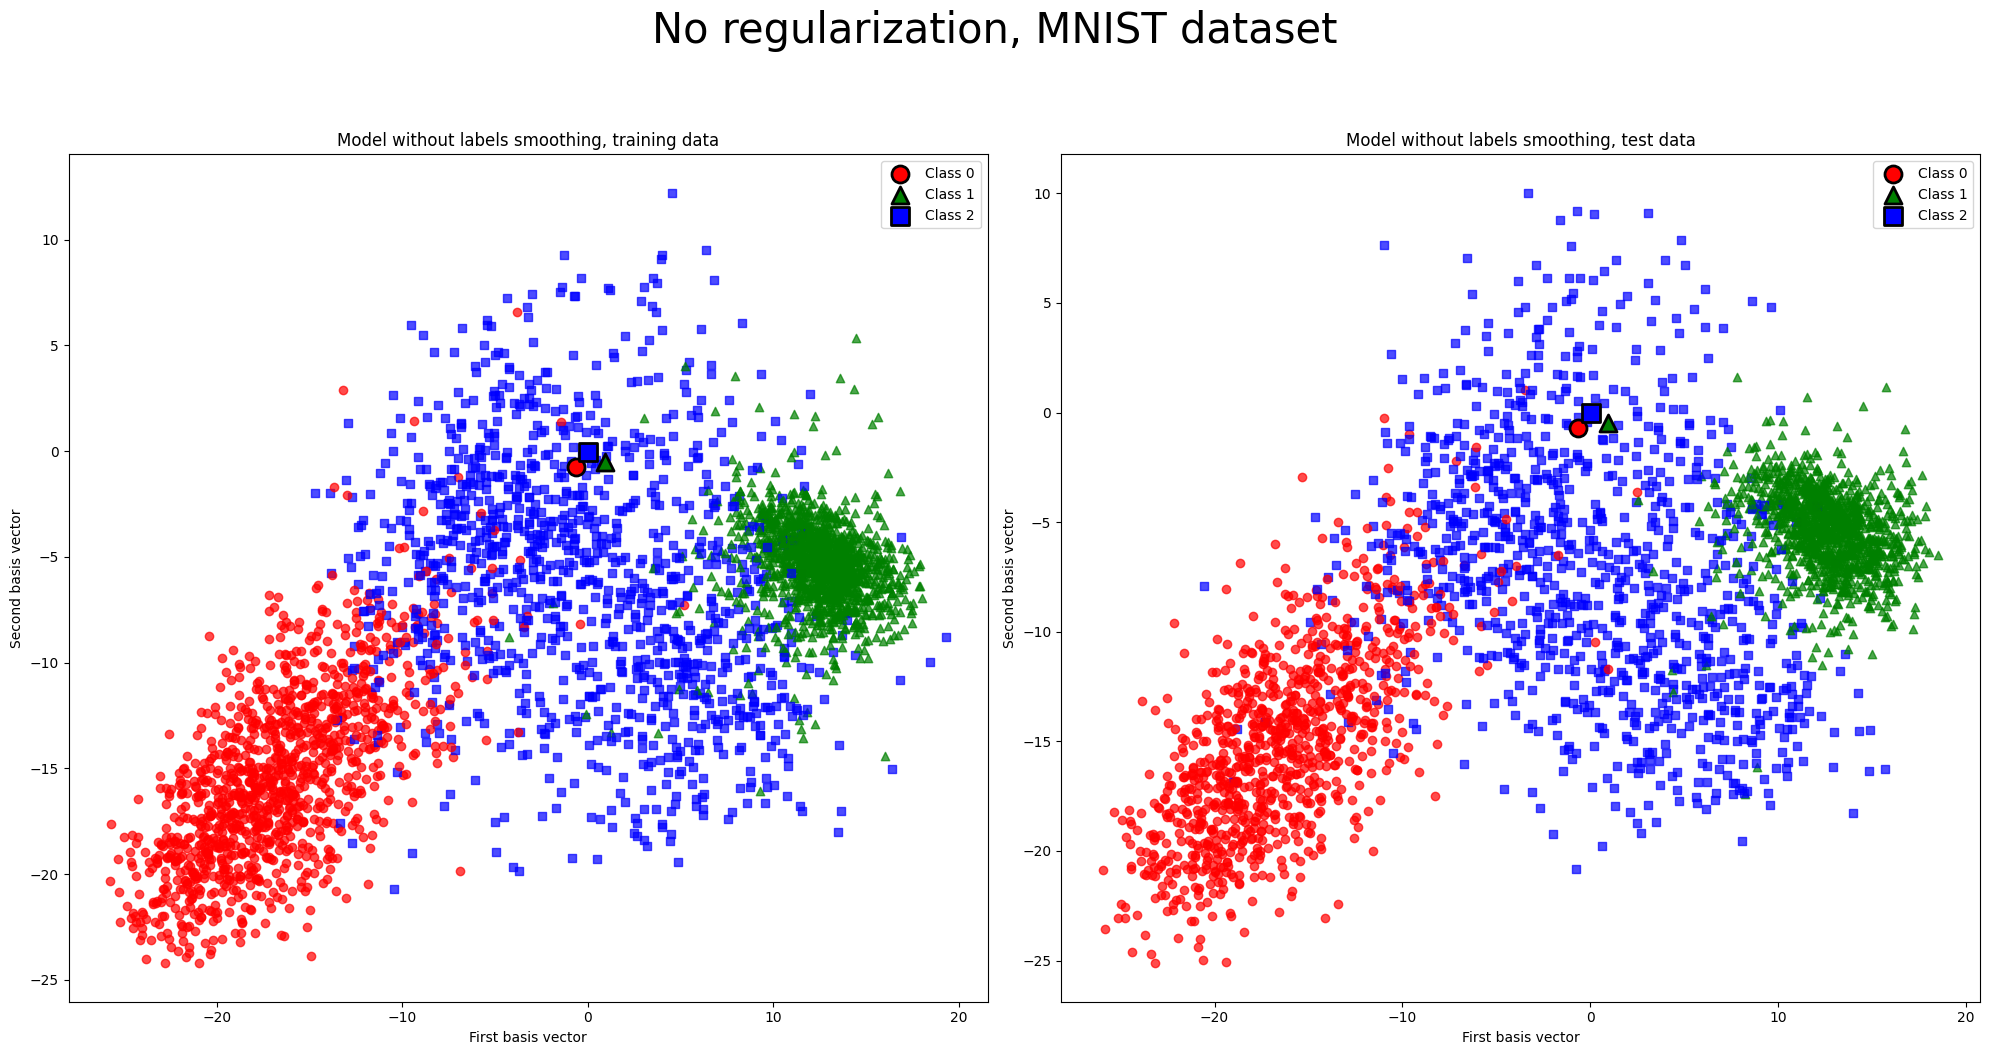

In [31]:
plot_label_smoothing_2d_projections(
    model_no_reg_MNIST,
    train_loader_MNIST,
    test_loader_MNIST,
    class_ids,
    train_title="Model without labels smoothing, training data",
    test_title="Model without labels smoothing, test data",
    sup_title="No regularization, MNIST dataset",
    fraction=0.2,
)

93it [00:03, 23.53it/s]
79it [00:05, 13.88it/s]


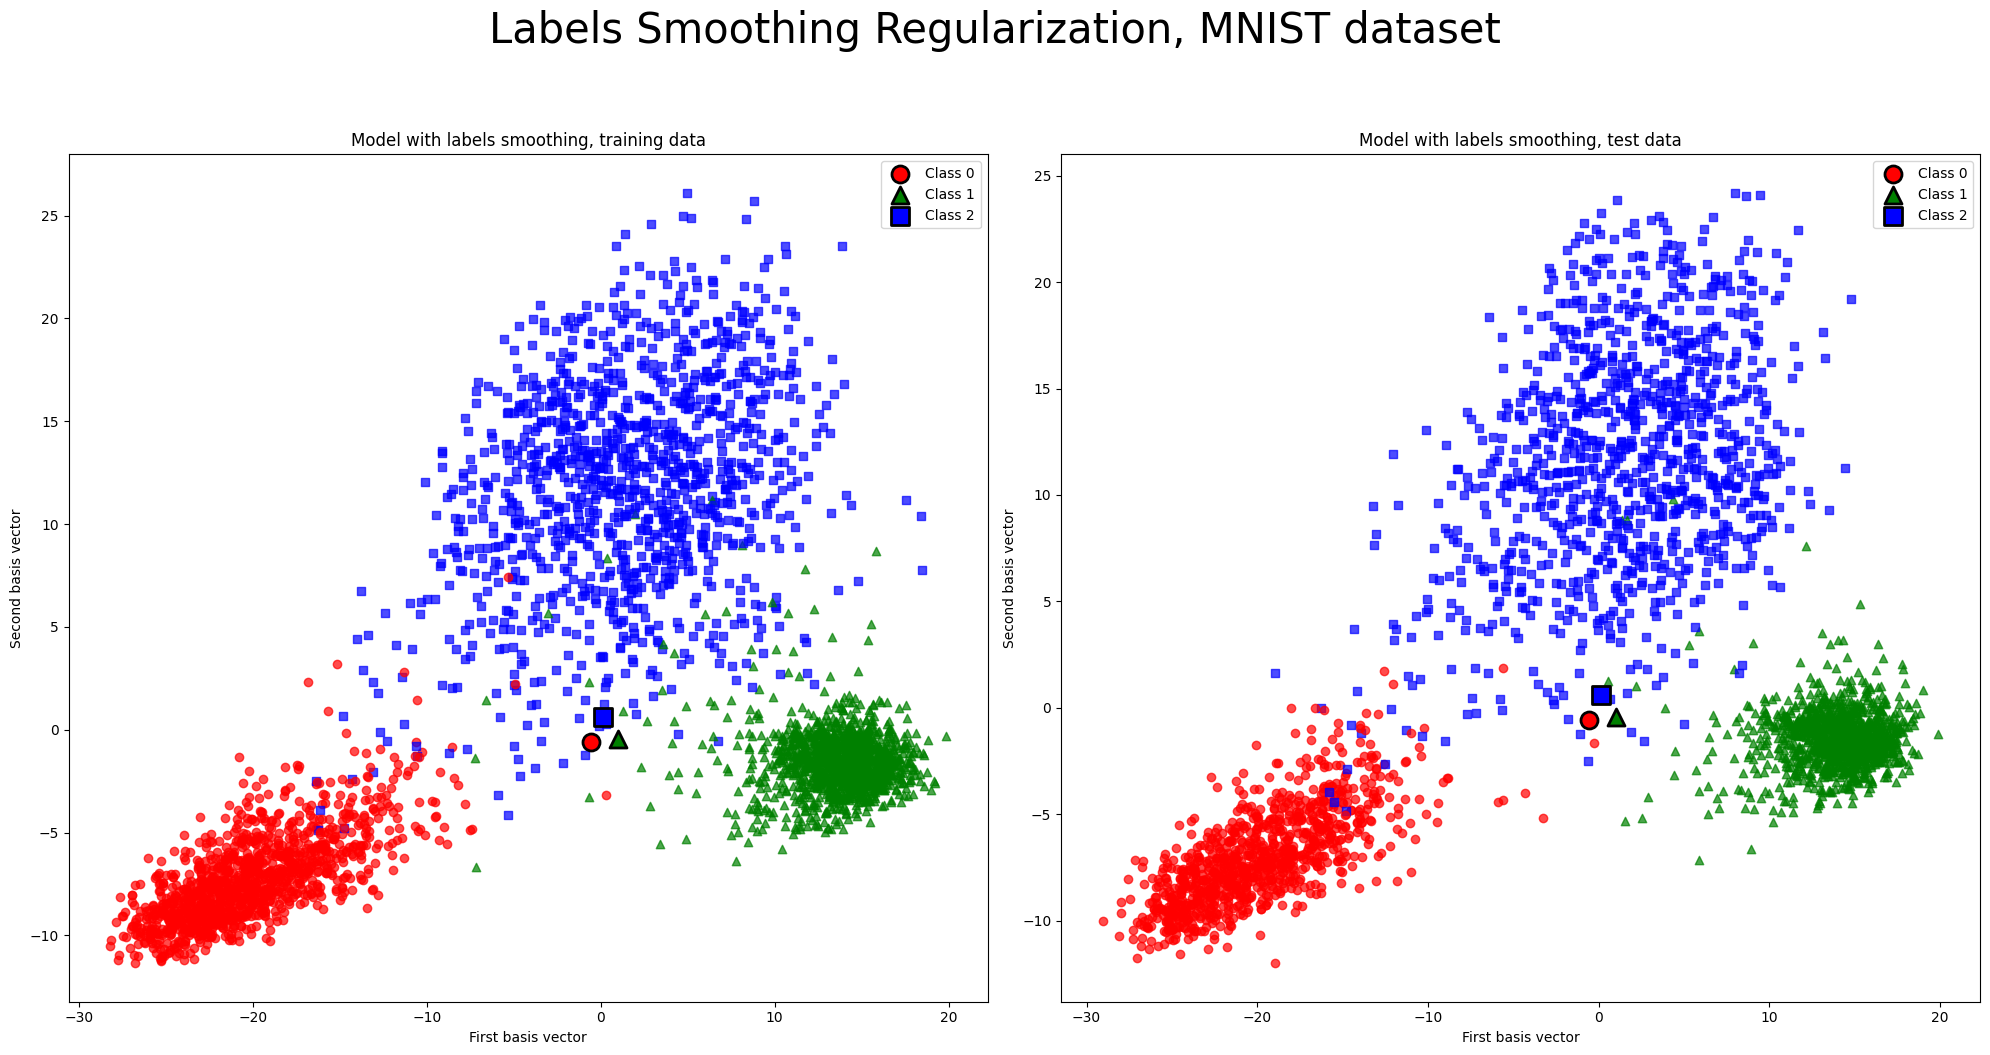

In [32]:
plot_label_smoothing_2d_projections(
    model_label_smoothing_MNIST,
    train_loader_MNIST,
    test_loader_MNIST,
    class_ids,
    train_title="Model with labels smoothing, training data",
    test_title="Model with labels smoothing, test data",
    sup_title="Labels Smoothing Regularization, MNIST dataset",
    fraction=0.2,
)

### CIFAR10 Visualization

In [33]:
# Pick three classes
class_ids = [0, 1, 2]

78it [00:02, 35.74it/s]
79it [00:02, 33.44it/s]


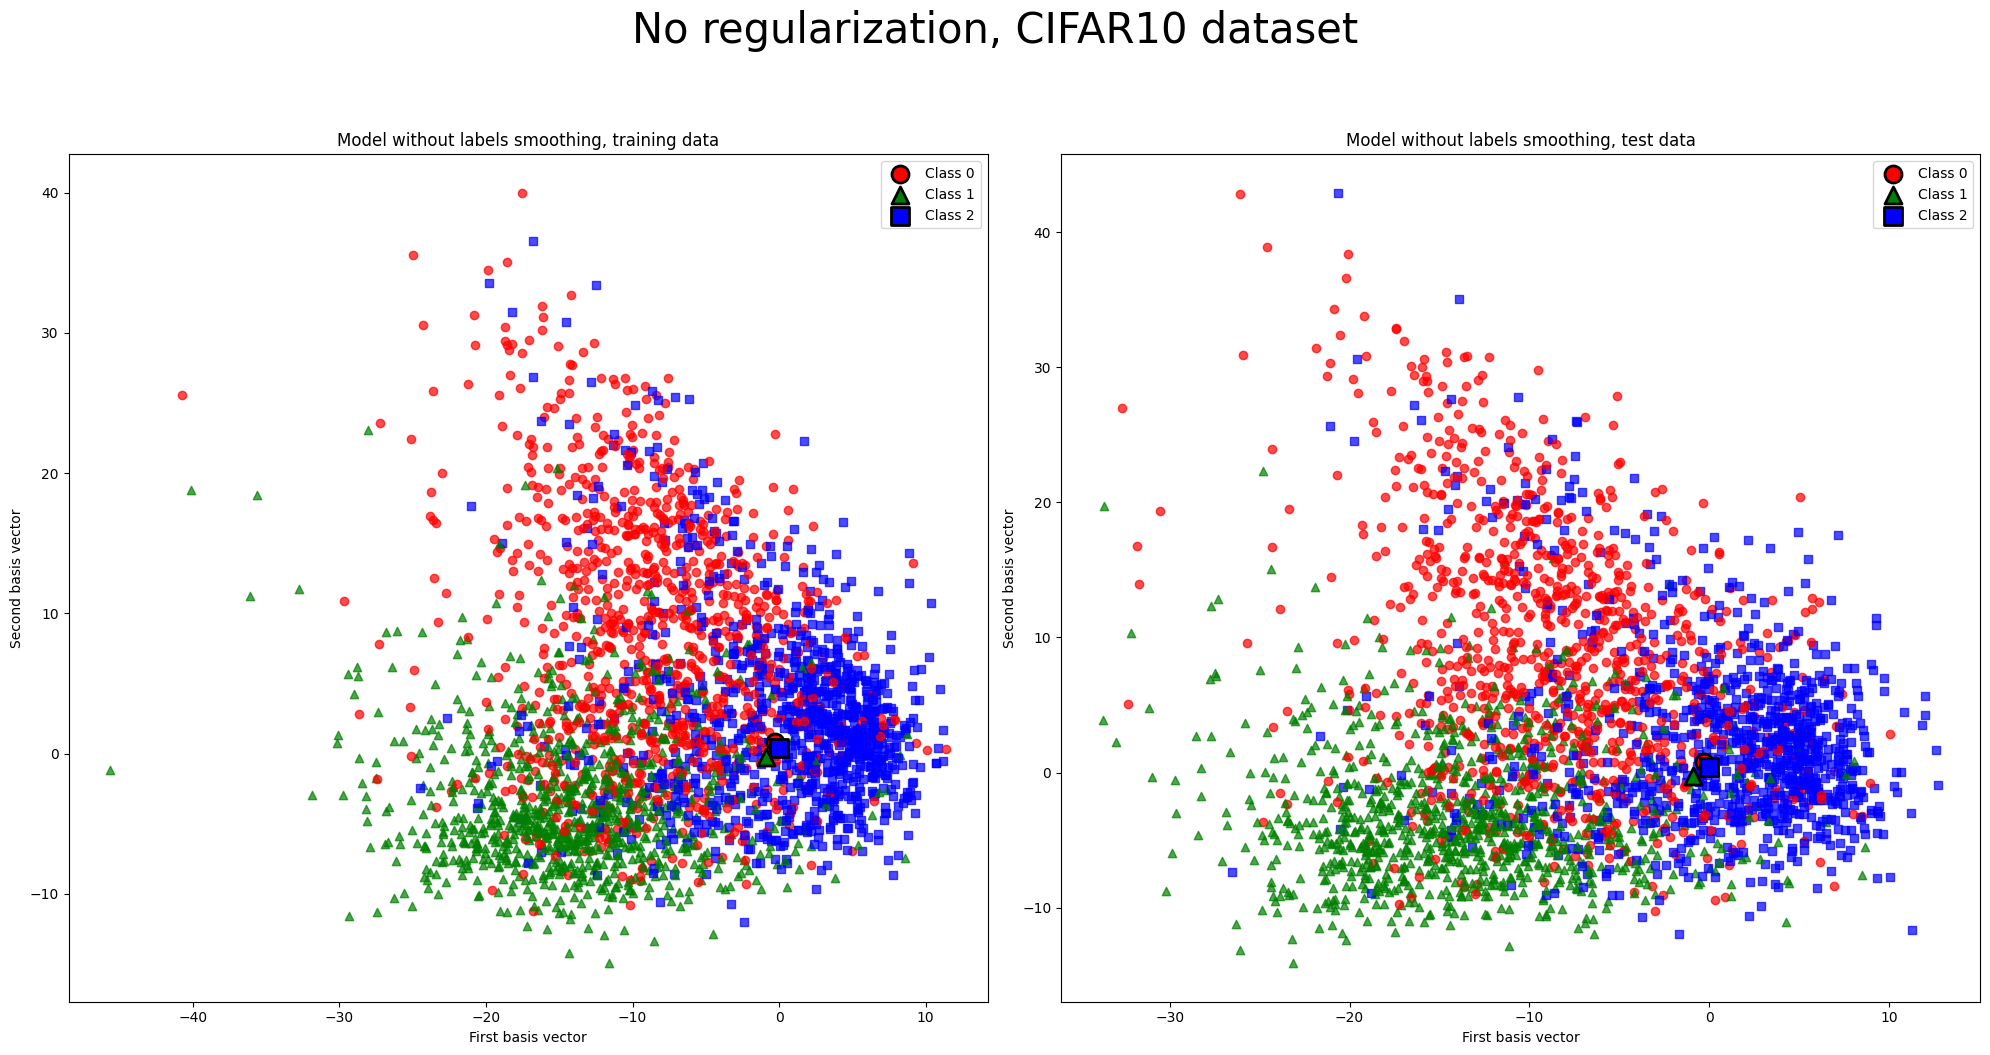

In [34]:
plot_label_smoothing_2d_projections(
    model_no_reg_CIFAR10,
    train_loader_CIFAR10,
    test_loader_CIFAR10,
    class_ids,
    train_title="Model without labels smoothing, training data",
    test_title="Model without labels smoothing, test data",
    sup_title="No regularization, CIFAR10 dataset",
    fraction=0.2,
)

78it [00:01, 39.91it/s]
79it [00:02, 35.00it/s]


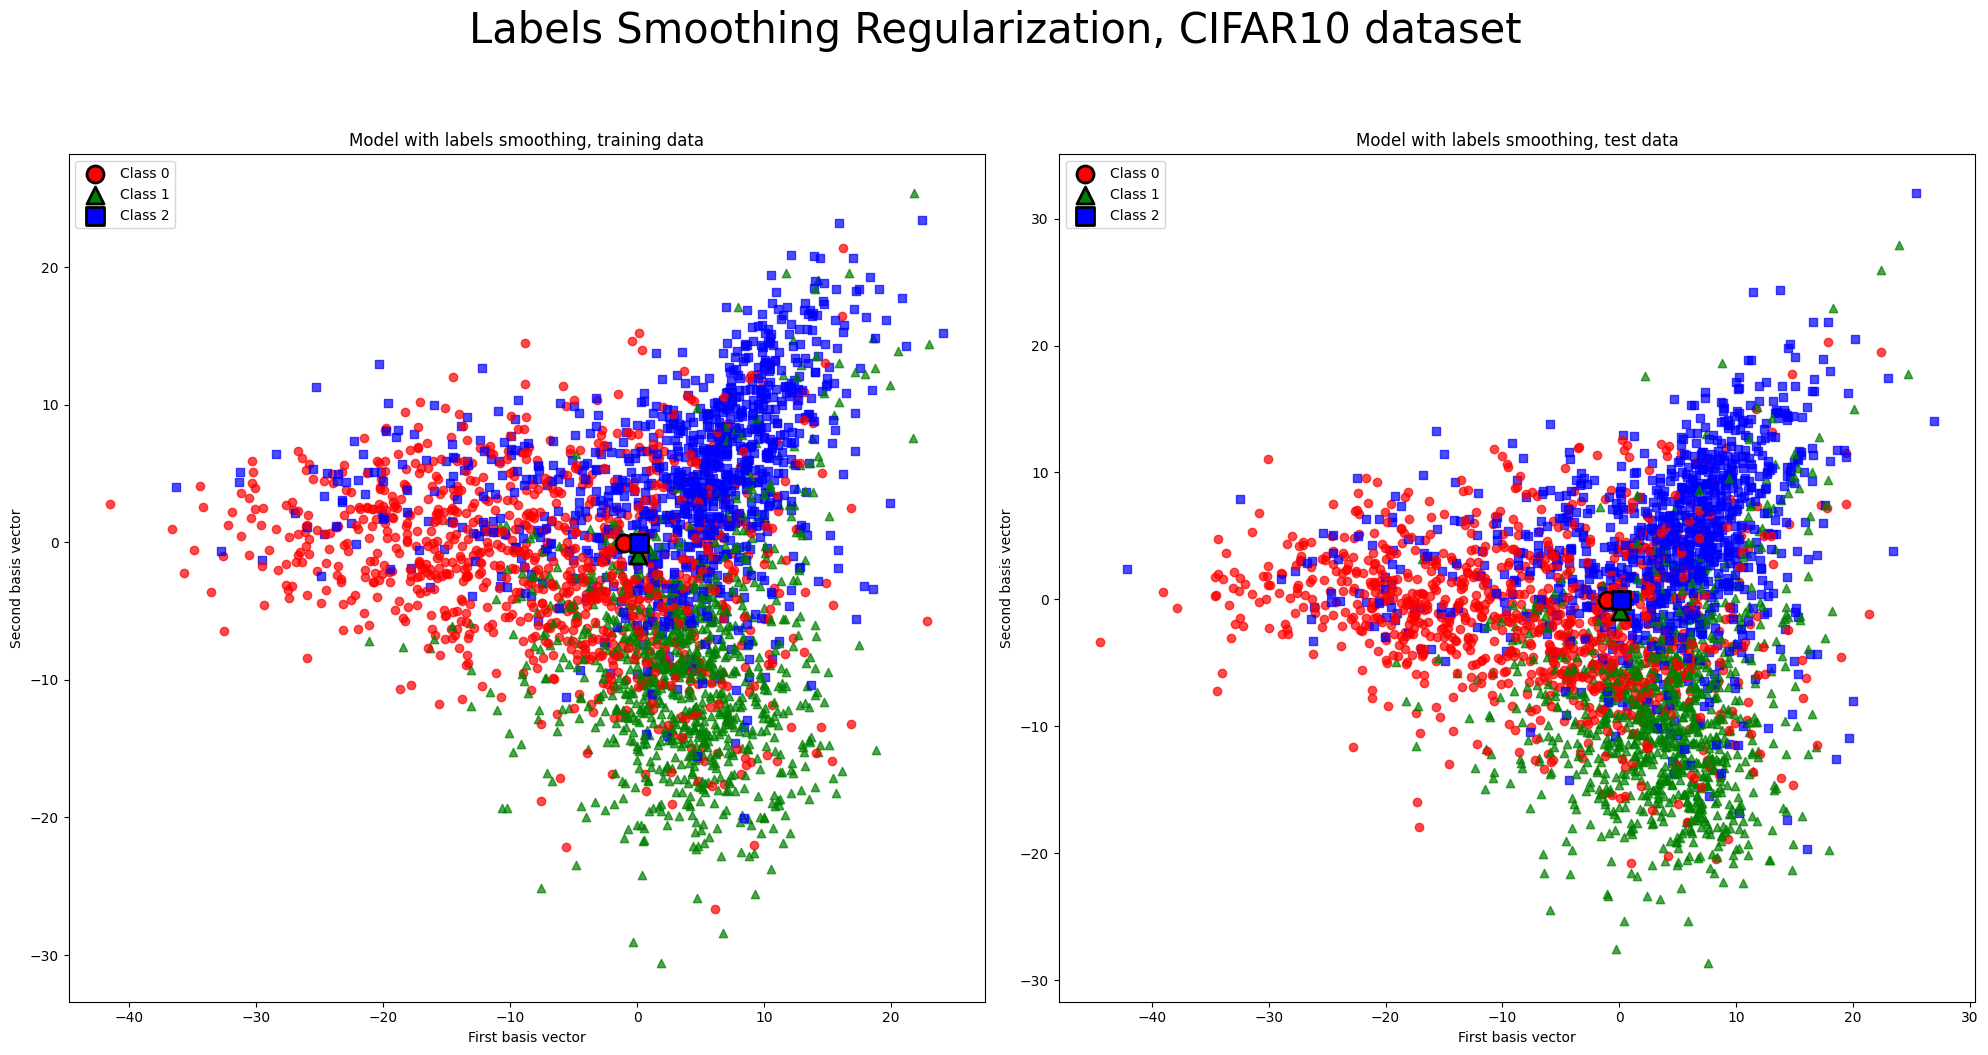

In [35]:
plot_label_smoothing_2d_projections(
    model_label_smoothing_CIFAR10,
    train_loader_CIFAR10,
    test_loader_CIFAR10,
    class_ids,
    train_title="Model with labels smoothing, training data",
    test_title="Model with labels smoothing, test data",
    sup_title="Labels Smoothing Regularization, CIFAR10 dataset",
    fraction=0.2,
)

### CIFAR100 Visualization

In [36]:
# Pick three classes
class_ids = [0, 1, 2]

78it [00:01, 57.96it/s]
79it [00:01, 48.82it/s]


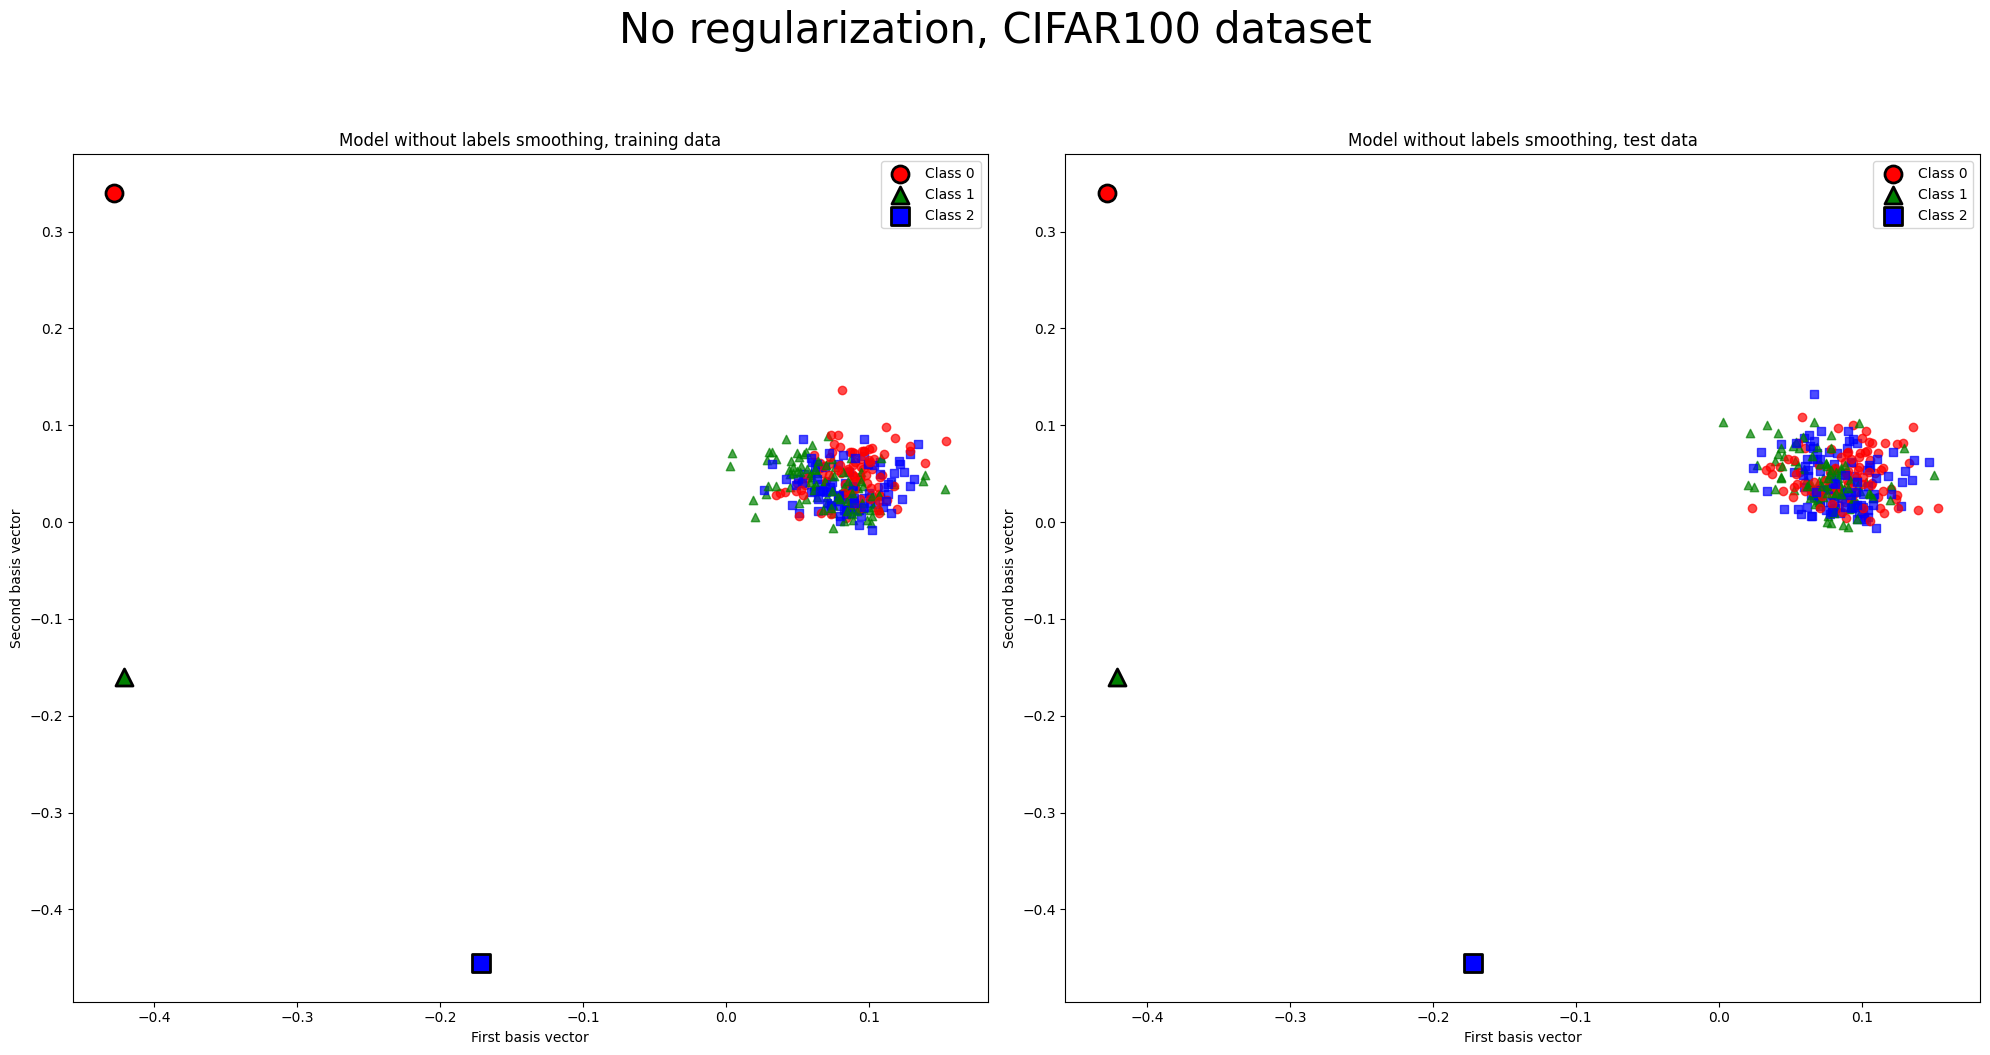

In [37]:
plot_label_smoothing_2d_projections(
    model_no_reg_CIFAR100,
    train_loader_CIFAR100,
    test_loader_CIFAR100,
    class_ids,
    train_title="Model without labels smoothing, training data",
    test_title="Model without labels smoothing, test data",
    sup_title="No regularization, CIFAR100 dataset",
    fraction=0.2,
)

78it [00:01, 56.18it/s]
79it [00:01, 48.55it/s]


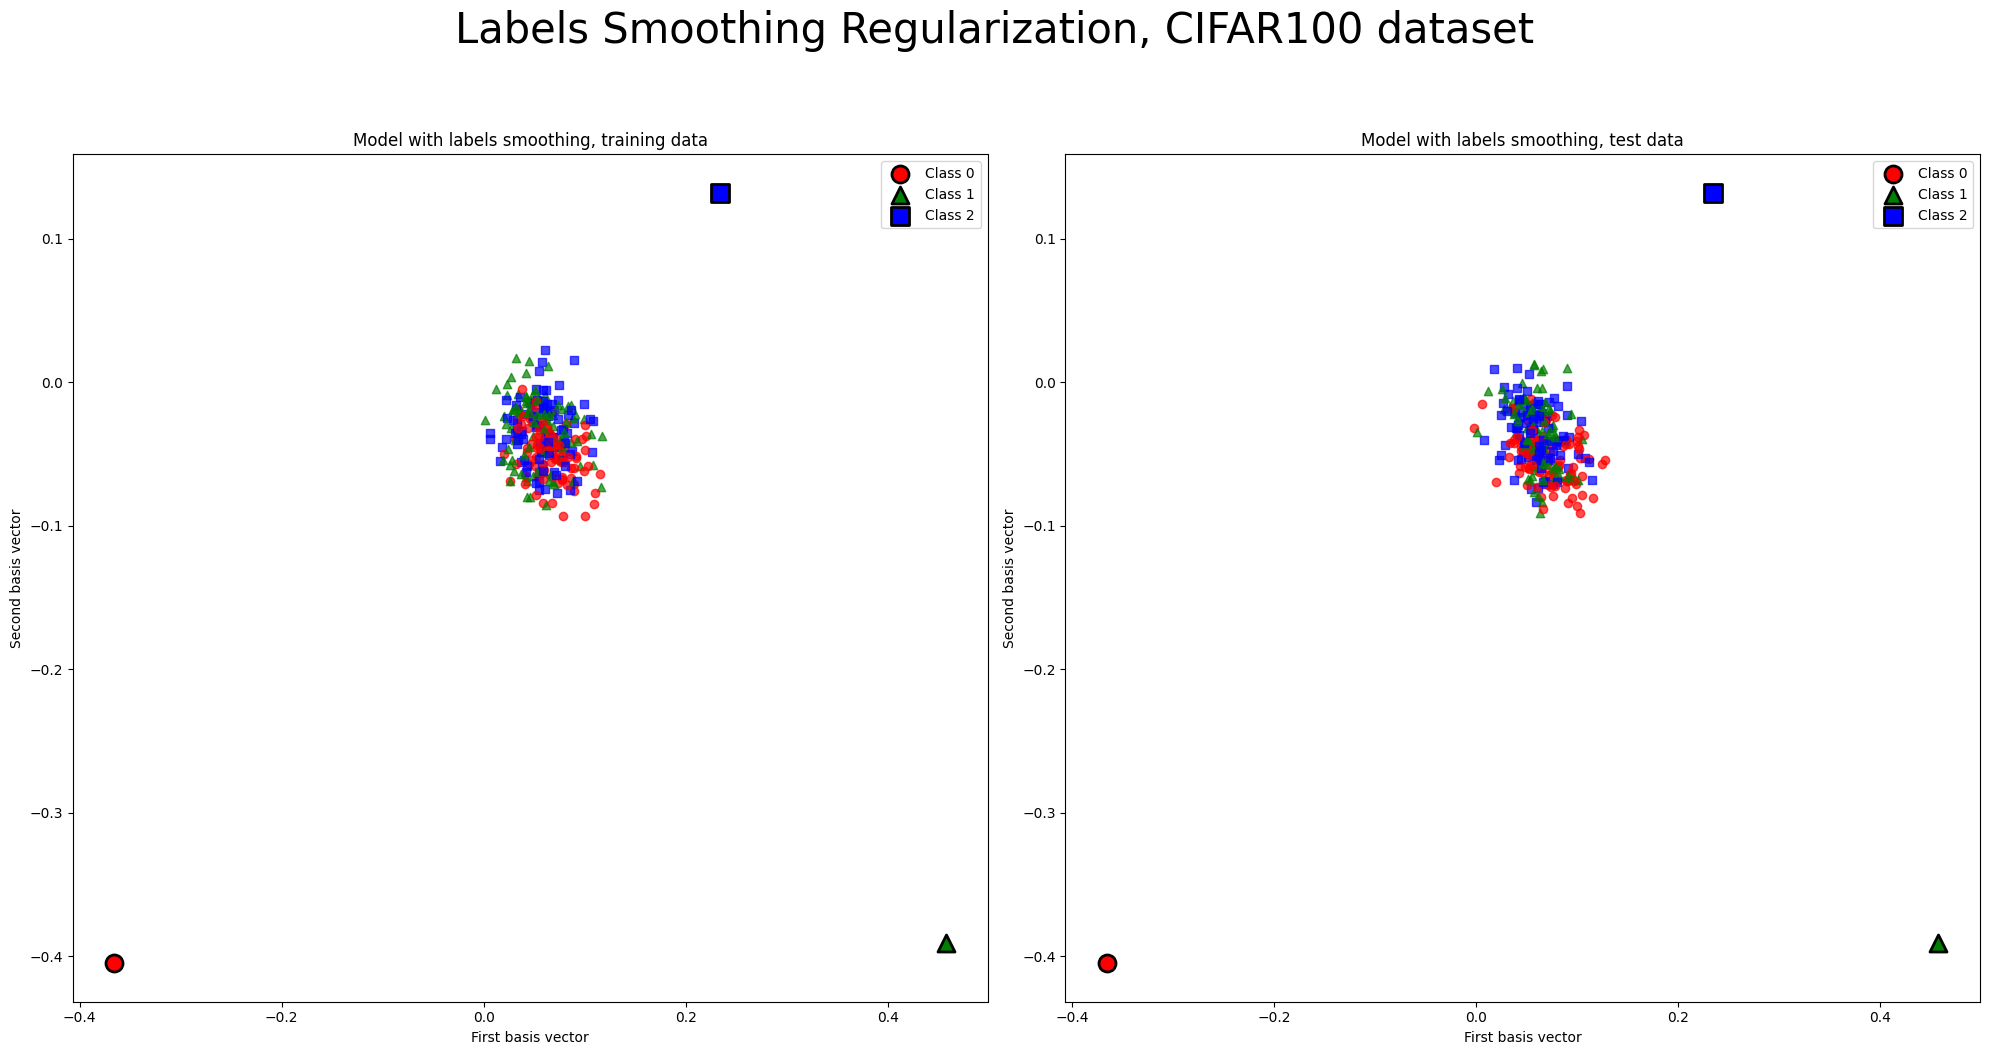

In [38]:
plot_label_smoothing_2d_projections(
    model_label_smoothing_CIFAR100,
    train_loader_CIFAR100,
    test_loader_CIFAR100,
    class_ids,
    train_title="Model with labels smoothing, training data",
    test_title="Model with labels smoothing, test data",
    sup_title="Labels Smoothing Regularization, CIFAR100 dataset",
    fraction=0.2,
)